In [1]:
import geopandas as gpd
import shapely
from shapely.geometry import box, LineString, Point,MultiPoint
from shapely.ops import nearest_points
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
import re
from IPython.core.interactiveshell import InteractiveShell
import time
import itertools
pd.set_option('display.max_rows', None)
InteractiveShell.ast_node_interactivity = "all"

/Applications/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
cwd = os.getcwd()
cwd

'/Users/lindsaygraff/Documents/Multimodal Transit Research/Code'

In [3]:
# Change directory to location of data
new_dir = cwd.replace('Code','Data/alleghenycounty_censusblock_2016/')
new_dir
os.chdir(new_dir)
# Read file
pgh_block_groups = gpd.read_file("Allegheny_County_Block_Groups_2016.shp", crs='epsg:4326')

'/Users/lindsaygraff/Documents/Multimodal Transit Research/Data/alleghenycounty_censusblock_2016/'

In [4]:
# Clip to study area
new_dir = cwd.replace('Code', 'Data/PGH_neighborhoods/')
os.chdir(new_dir)
pgh_study_area = pd.read_pickle('pgh_study_area.csv')
pgh_study_area.to_crs('epsg:4326', inplace=True)

<AxesSubplot:>

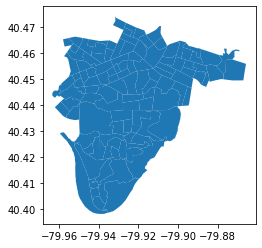

In [5]:
pgh_block_groups_clip = gpd.clip(pgh_block_groups, pgh_study_area)
pgh_block_groups_clip.plot()

<AxesSubplot:>

<AxesSubplot:>

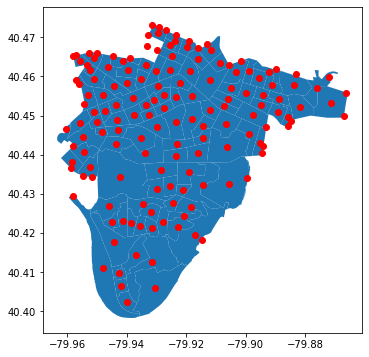

In [6]:
# Get centroid of each block group. Will be used as orgs and dests
pgh_block_groups_clip.loc[:,'bg_centroid'] = pgh_block_groups_clip['geometry'].to_crs(crs=3857).centroid
bg_centroids = gpd.GeoDataFrame(pgh_block_groups_clip['bg_centroid']).rename(columns={'bg_centroid':'geometry'})
bg_centroids.to_crs('epsg:4326', inplace=True)
fig, ax = plt.subplots(figsize=(6,6))
pgh_block_groups_clip.plot(ax=ax)
bg_centroids.plot(ax=ax, color='red')

In [7]:
# Save as file
new_dir = cwd.replace('Code', 'Data/')
os.chdir(new_dir)
bg_centroids.to_pickle('bg_centroids.csv')

In [8]:
# Also save to output data, but add x and y to avoid geopandas use in ubuntu (not sure if it's already installed as python package)

In [9]:
cwd

'/Users/lindsaygraff/Documents/Multimodal Transit Research/Code'

In [10]:
bg_centroids['x'] = bg_centroids.geometry.x
bg_centroids['y'] = bg_centroids.geometry.y
bg_centroids.to_pickle(cwd + '/OutputData/bg_centroids.csv')

In [14]:
# # add the org and dst nodes to the graph along with their positions 
# G_u_od = G_u.copy()  # helpful to do everything on a graph copy 
# G_u_od_adj = G_u_adj.copy()



# get all possible OD pairs
indices = list(range(len(bg_centroids)))
idx_pairs = list(itertools.permutations(indices, 2))
# For now, just test with the first 5 pairs
od_pairs = idx_pairs[:5]

#od_coords = np.zeros(2*od_pairs,2)

for i,(o,d) in enumerate(od_pairs):
    print(i,o,d)
    o_coord = (bg_centroids.iloc[o]['geometry'].x, bg_centroids.iloc[o]['geometry'].y)
    d_coord = (bg_centroids.iloc[d]['geometry'].x, bg_centroids.iloc[d]['geometry'].y)
#     G_u_od.add_nodes_from([('org'+str(i), {'pos': o_coord}), 
#                            ('dst'+str(i), {'pos': d_coord})])

0 0 1
1 0 2
2 0 3
3 0 4
4 0 5
